# R: Part 1 - data.table
For introduction see part 0: https://github.com/jphall663/GWU_data_mining/blob/master/01_basic_data_prep/src/notebooks/r/R_Part_0_Basics_dplyr_and_ggplot2.ipynb
***
## 1. Load library

`data.table` is an efficient package for manipulating data sets
* data.table is implemented in optimized C and often attempts to update items by reference to avoid copying large amounts of data
* data.table is a subclass of data.frame and generally accepts data.frame syntax 
* general form of a `data.table` is `dt[i, j, by]`
  * `i` is row index, indexed from 1 ...
  * `j` is col index, indexed from 1 ...
  * by is by-group var name

In [1]:
library(data.table)

***
## 2. Setting the working directory

#### Enter the directory location of this file within single quotes

In [2]:
# '<-' is the preferred assignment operator in R
# '/' is the safest directory separator character to use

git_dir <- 'C:/workspace/GWU_data_mining/01_basic_data_prep/src/notebooks/r'

#### Set the working directory

* The working directory is where files are written to and read from by default
* `setwd()` sets the working directory
* `getwd()` prints the current working directory

In [3]:
setwd(git_dir)
getwd()

[1] "C:/workspace/GWU_data_mining/01_basic_data_prep/src/notebooks"

***
## 3. Generating a sample data set

#### Set the number of rows and columns for the sample data set

In [4]:
n_rows <- 1000
n_vars <- 2

#### Create a key variable
* A key variable has a unique value for each row of a data set
* `seq()` generates values from a number (default = 1), to another number, by a certain value (default = 1)
* Many types of data structures in R have key variables (a.k.a. row names) by default

In [5]:
key <- seq(n_rows)

#### Show the first five elements of `key`

Most data structures in R can be 'sliced', i.e. using numeric indices to select a subset of items 

In [6]:
key[1:5] 

[1] 1 2 3 4 5

#### Create lists of strings that will become column names

`paste()` concatentates strings with a separator character in between them

In [7]:
num_vars <- paste('numeric', seq_len(n_vars), sep = '')
num_vars 

char_vars <- paste('char', seq_len(n_vars), sep = '')
char_vars

[1] "numeric1" "numeric2"

[1] "char1" "char2"

#### Create a list of strings from which to generate random text variables
* `sapply()` applies a function to a sequence of values
* `LETTERS` is a character vector containing uppercase letters
* An anonymous function is defined that replicates a value 8 times with no seperator character

In [8]:
text_draw <- sapply(LETTERS[1:7],
                    FUN = function(x) paste(rep(x, 8), collapse = ""))
text_draw 

A          B          C          D          E          F          G 
"AAAAAAAA" "BBBBBBBB" "CCCCCCCC" "DDDDDDDD" "EEEEEEEE" "FFFFFFFF" "GGGGGGGG"

#### Create a sample `data.table`
* `replicate()` replicates `n_row` length lists of numeric values `n_vars` times
* `replicate()` replicates n_var lists of n_row elements from text_draw sampled randomly from `test_draw` using the `sample()` function

In [9]:
scratch_dt <- data.table(key,
                         replicate(n_vars, runif(n_rows)), 
                         replicate(n_vars, sample(text_draw, n_rows, 
                                                  replace = TRUE)))

The `data.table::set*` family of methods in data.table always updates items by reference for efficiency

In [10]:
setnames(scratch_dt, c('key', num_vars, char_vars))

Set option to print first 5 and last 5 rows of `data.table` by default

In [11]:
options(datatable.print.topn=5)
print(scratch_dt)

       key   numeric1    numeric2    char1    char2
   1:    1 0.51494785 0.767991723 FFFFFFFF FFFFFFFF
   2:    2 0.36132422 0.868816448 FFFFFFFF DDDDDDDD
   3:    3 0.71456376 0.160537094 GGGGGGGG AAAAAAAA
   4:    4 0.64633263 0.550704608 BBBBBBBB CCCCCCCC
   5:    5 0.11546163 0.044725391 AAAAAAAA CCCCCCCC
  ---                                              
 996:  996 0.49468994 0.908724921 AAAAAAAA EEEEEEEE
 997:  997 0.07238554 0.560199407 AAAAAAAA GGGGGGGG
 998:  998 0.03046075 0.008601266 DDDDDDDD GGGGGGGG
 999:  999 0.12894029 0.381171830 DDDDDDDD BBBBBBBB
1000: 1000 0.93970260 0.632544576 GGGGGGGG FFFFFFFF


***
## 4. Plotting variables in a table
`data.table` enables simple plotting for numeric variables

NULL

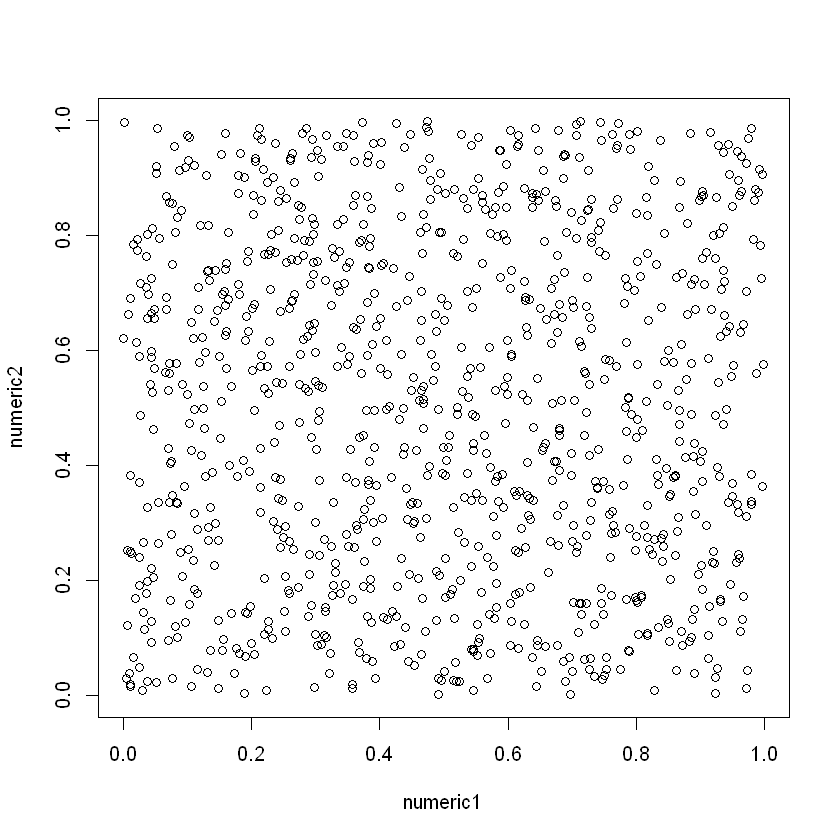

In [12]:
scratch_dt[,plot(numeric1, numeric2)]

***
## 5. Subsetting tables

### Subsetting a `data.table` by column

Selecting a single column results in a vector

In [13]:
class(scratch_dt[,char1])
length(scratch_dt[,char1])

[1] "character"

[1] 1000

##### Multiple columns can be selected

Specifying multiple columns by a vector results in a concatenated vector

In [14]:
class(scratch_dt[,c(numeric1, char1)])
length(scratch_dt[,c(numeric1, char1)])

[1] "character"

[1] 2000

Specifying multiple columns by list results in a `data.table`

In [15]:
class(scratch_dt[,list(numeric1, char1)])
print(scratch_dt[,list(numeric1, char1)])

[1] "data.table" "data.frame"

        numeric1    char1
   1: 0.51494785 FFFFFFFF
   2: 0.36132422 FFFFFFFF
   3: 0.71456376 GGGGGGGG
   4: 0.64633263 BBBBBBBB
   5: 0.11546163 AAAAAAAA
  ---                    
 996: 0.49468994 AAAAAAAA
 997: 0.07238554 AAAAAAAA
 998: 0.03046075 DDDDDDDD
 999: 0.12894029 DDDDDDDD
1000: 0.93970260 GGGGGGGG


'.' is an alias for 'list'

In [16]:
class(scratch_dt[,.(numeric1, char1)] )
print(scratch_dt[,.(numeric1, char1)])

[1] "data.table" "data.frame"

        numeric1    char1
   1: 0.51494785 FFFFFFFF
   2: 0.36132422 FFFFFFFF
   3: 0.71456376 GGGGGGGG
   4: 0.64633263 BBBBBBBB
   5: 0.11546163 AAAAAAAA
  ---                    
 996: 0.49468994 AAAAAAAA
 997: 0.07238554 AAAAAAAA
 998: 0.03046075 DDDDDDDD
 999: 0.12894029 DDDDDDDD
1000: 0.93970260 GGGGGGGG


##### Computed columns

Compute a standalone vector and display first five elements

In [17]:
scratch_dt[1:5, round(numeric1, 1)] # compute standalone vector

[1] 0.5 0.4 0.7 0.6 0.1

Compute a new column with assigned name

In [18]:
print(scratch_dt[, .(new_numeric = round(numeric1, 1))]) # assign name

      new_numeric
   1:         0.5
   2:         0.4
   3:         0.7
   4:         0.6
   5:         0.1
  ---            
 996:         0.5
 997:         0.1
 998:         0.0
 999:         0.1
1000:         0.9


### Subsetting a `data.table` by row

Use numeric indices (or 'slicing')

In [19]:
scratch_dt[3:5]

key,numeric1,numeric2,char1,char2
3,0.7145638,0.16053709,GGGGGGGG,AAAAAAAA
4,0.6463326,0.55070461,BBBBBBBB,CCCCCCCC
5,0.1154616,0.04472539,AAAAAAAA,CCCCCCCC


In [20]:
scratch_dt[3:5,] # comma is optional

key,numeric1,numeric2,char1,char2
3,0.7145638,0.16053709,GGGGGGGG,AAAAAAAA
4,0.6463326,0.55070461,BBBBBBBB,CCCCCCCC
5,0.1154616,0.04472539,AAAAAAAA,CCCCCCCC


Use variable values

In [21]:
print(scratch_dt[char1 == 'DDDDDDDD'])

     key    numeric1    numeric2    char1    char2
  1:   7 0.567380503 0.238937604 DDDDDDDD DDDDDDDD
  2:   9 0.002596827 0.995908902 DDDDDDDD DDDDDDDD
  3:  29 0.072774363 0.577872526 DDDDDDDD AAAAAAAA
  4:  31 0.863638343 0.285148558 DDDDDDDD BBBBBBBB
  5:  43 0.625725270 0.123548673 DDDDDDDD GGGGGGGG
 ---                                              
129: 983 0.492702231 0.208963786 DDDDDDDD CCCCCCCC
130: 990 0.442164307 0.360159572 DDDDDDDD FFFFFFFF
131: 992 0.075625865 0.279108718 DDDDDDDD DDDDDDDD
132: 998 0.030460753 0.008601266 DDDDDDDD GGGGGGGG
133: 999 0.128940293 0.381171830 DDDDDDDD BBBBBBBB


In [22]:
print(scratch_dt[char1 %in% c('DDDDDDDD', 'EEEEEEEE')])

     key    numeric1    numeric2    char1    char2
  1:   7 0.567380503 0.238937604 DDDDDDDD DDDDDDDD
  2:   9 0.002596827 0.995908902 DDDDDDDD DDDDDDDD
  3:  14 0.836863027 0.964689109 EEEEEEEE EEEEEEEE
  4:  26 0.734141510 0.123778643 EEEEEEEE CCCCCCCC
  5:  29 0.072774363 0.577872526 DDDDDDDD AAAAAAAA
 ---                                              
265: 983 0.492702231 0.208963786 DDDDDDDD CCCCCCCC
266: 990 0.442164307 0.360159572 DDDDDDDD FFFFFFFF
267: 992 0.075625865 0.279108718 DDDDDDDD DDDDDDDD
268: 998 0.030460753 0.008601266 DDDDDDDD GGGGGGGG
269: 999 0.128940293 0.381171830 DDDDDDDD BBBBBBBB


##### .N operator
* Used in `i` (i.e. as a row  index) `.N` represents the numeric value of the last row of a `data.table`
* Used in `j` (i.e. as a column index) `.N` represents the number of rows in a `data.table`

In [23]:
scratch_dt[.N]

key,numeric1,numeric2,char1,char2
1000,0.9397026,0.6325446,GGGGGGGG,FFFFFFFF


In [24]:
scratch_dt[,.N]

[1] 1000

***
## 6. Sorting a table 

`data.table::setorder` reorders columns by reference

In [25]:
sorted <- setorder(scratch_dt, char1)
print(sorted)

       key  numeric1   numeric2    char1    char2
   1:    5 0.1154616 0.04472539 AAAAAAAA CCCCCCCC
   2:    6 0.2587220 0.57239902 AAAAAAAA AAAAAAAA
   3:    8 0.9281074 0.95587943 AAAAAAAA GGGGGGGG
   4:   15 0.4683239 0.51412315 AAAAAAAA EEEEEEEE
   5:   16 0.6581002 0.43747618 AAAAAAAA BBBBBBBB
  ---                                            
 996:  967 0.3230315 0.07210364 GGGGGGGG AAAAAAAA
 997:  968 0.7577926 0.35760053 GGGGGGGG GGGGGGGG
 998:  978 0.8622021 0.72771298 GGGGGGGG BBBBBBBB
 999:  985 0.1913742 0.06705371 GGGGGGGG AAAAAAAA
1000: 1000 0.9397026 0.63254458 GGGGGGGG FFFFFFFF


When used in `data.table`, `order()` also reorders columns by reference

In [26]:
sorted <- scratch_dt[order(char1)]
print(sorted)

       key  numeric1   numeric2    char1    char2
   1:    5 0.1154616 0.04472539 AAAAAAAA CCCCCCCC
   2:    6 0.2587220 0.57239902 AAAAAAAA AAAAAAAA
   3:    8 0.9281074 0.95587943 AAAAAAAA GGGGGGGG
   4:   15 0.4683239 0.51412315 AAAAAAAA EEEEEEEE
   5:   16 0.6581002 0.43747618 AAAAAAAA BBBBBBBB
  ---                                            
 996:  967 0.3230315 0.07210364 GGGGGGGG AAAAAAAA
 997:  968 0.7577926 0.35760053 GGGGGGGG GGGGGGGG
 998:  978 0.8622021 0.72771298 GGGGGGGG BBBBBBBB
 999:  985 0.1913742 0.06705371 GGGGGGGG AAAAAAAA
1000: 1000 0.9397026 0.63254458 GGGGGGGG FFFFFFFF


Sort orders can be specified by using `order()`

In [27]:
sorted2 <- scratch_dt[order(char1, -numeric1)]
print(sorted2)

      key   numeric1   numeric2    char1    char2
   1: 157 0.99682504 0.36300892 AAAAAAAA BBBBBBBB
   2:  19 0.99241815 0.78233248 AAAAAAAA BBBBBBBB
   3: 962 0.99226886 0.91510083 AAAAAAAA DDDDDDDD
   4: 841 0.98926923 0.87481324 AAAAAAAA GGGGGGGG
   5: 464 0.98658554 0.56020669 AAAAAAAA BBBBBBBB
  ---                                            
 996: 772 0.04619239 0.81236111 GGGGGGGG DDDDDDDD
 997:  51 0.04508035 0.52753393 GGGGGGGG CCCCCCCC
 998: 492 0.02192159 0.77429978 GGGGGGGG FFFFFFFF
 999: 822 0.01283920 0.24591820 GGGGGGGG DDDDDDDD
1000:  55 0.01026715 0.03739443 GGGGGGGG GGGGGGGG


#### data.table::setkey
* Reorders columns by reference by the specified key variable (here called 'key')
* Sets the variable to the key of the data.table for future operations
* Subsetting and selecting by the key variable will be more efficient in future operations    

In [28]:
sorted3 <- setkey(scratch_dt, key)
print(sorted3)

       key   numeric1    numeric2    char1    char2
   1:    1 0.51494785 0.767991723 FFFFFFFF FFFFFFFF
   2:    2 0.36132422 0.868816448 FFFFFFFF DDDDDDDD
   3:    3 0.71456376 0.160537094 GGGGGGGG AAAAAAAA
   4:    4 0.64633263 0.550704608 BBBBBBBB CCCCCCCC
   5:    5 0.11546163 0.044725391 AAAAAAAA CCCCCCCC
  ---                                              
 996:  996 0.49468994 0.908724921 AAAAAAAA EEEEEEEE
 997:  997 0.07238554 0.560199407 AAAAAAAA GGGGGGGG
 998:  998 0.03046075 0.008601266 DDDDDDDD GGGGGGGG
 999:  999 0.12894029 0.381171830 DDDDDDDD BBBBBBBB
1000: 1000 0.93970260 0.632544576 GGGGGGGG FFFFFFFF


***
## 7. Updating a table

#### Update rows by reference using the := operator
##### (data.table supports overwrite of data)

In [29]:
scratch_dt2 <- scratch_dt[key > 500, char1 := 'ZZZZZZZZ']
print(scratch_dt2)

       key   numeric1    numeric2    char1    char2
   1:    1 0.51494785 0.767991723 FFFFFFFF FFFFFFFF
   2:    2 0.36132422 0.868816448 FFFFFFFF DDDDDDDD
   3:    3 0.71456376 0.160537094 GGGGGGGG AAAAAAAA
   4:    4 0.64633263 0.550704608 BBBBBBBB CCCCCCCC
   5:    5 0.11546163 0.044725391 AAAAAAAA CCCCCCCC
  ---                                              
 996:  996 0.49468994 0.908724921 ZZZZZZZZ EEEEEEEE
 997:  997 0.07238554 0.560199407 ZZZZZZZZ GGGGGGGG
 998:  998 0.03046075 0.008601266 ZZZZZZZZ GGGGGGGG
 999:  999 0.12894029 0.381171830 ZZZZZZZZ BBBBBBBB
1000: 1000 0.93970260 0.632544576 ZZZZZZZZ FFFFFFFF


#### Create new columns by reference using the := operator

In [30]:
head(scratch_dt2[, new_numeric := round(numeric1, 1)])

key,numeric1,numeric2,char1,char2,new_numeric
1,0.5149478,0.76799172,FFFFFFFF,FFFFFFFF,0.5
2,0.3613242,0.86881645,FFFFFFFF,DDDDDDDD,0.4
3,0.7145638,0.16053709,GGGGGGGG,AAAAAAAA,0.7
4,0.6463326,0.55070461,BBBBBBBB,CCCCCCCC,0.6
5,0.1154616,0.04472539,AAAAAAAA,CCCCCCCC,0.1
6,0.2587220,0.57239902,AAAAAAAA,AAAAAAAA,0.3


## 8. Adding data to the table

Use `data.table::rbindlist` to stack `data.tables` vertically

In [31]:
bindr <- rbindlist(list(sorted, sorted2))
nrow(bindr)

[1] 2000

#### `data.table::merge` joins tables side-by-side using a common key (or 'by') variable 
* Joining data.tables without prespecified keys (i.e. by using data.table::setkey) requires that a key for the join be specified
* joining data.tables with prespecified keys does not require that a key be specified when data.table::merge is called
* The prefix 'x.' is added to the left table variable names by default
* The prefix 'y.' is added to the right table variables names by default

In [32]:
joined1 <- merge(sorted, sorted2, by = c('key'))
print(joined1)

       key numeric1.x  numeric2.x  char1.x  char2.x numeric1.y  numeric2.y
   1:    1 0.51494785 0.767991723 FFFFFFFF FFFFFFFF 0.51494785 0.767991723
   2:    2 0.36132422 0.868816448 FFFFFFFF DDDDDDDD 0.36132422 0.868816448
   3:    3 0.71456376 0.160537094 GGGGGGGG AAAAAAAA 0.71456376 0.160537094
   4:    4 0.64633263 0.550704608 BBBBBBBB CCCCCCCC 0.64633263 0.550704608
   5:    5 0.11546163 0.044725391 AAAAAAAA CCCCCCCC 0.11546163 0.044725391
  ---                                                                     
 996:  996 0.49468994 0.908724921 AAAAAAAA EEEEEEEE 0.49468994 0.908724921
 997:  997 0.07238554 0.560199407 AAAAAAAA GGGGGGGG 0.07238554 0.560199407
 998:  998 0.03046075 0.008601266 DDDDDDDD GGGGGGGG 0.03046075 0.008601266
 999:  999 0.12894029 0.381171830 DDDDDDDD BBBBBBBB 0.12894029 0.381171830
1000: 1000 0.93970260 0.632544576 GGGGGGGG FFFFFFFF 0.93970260 0.632544576
       char1.y  char2.y
   1: FFFFFFFF FFFFFFFF
   2: FFFFFFFF DDDDDDDD
   3: GGGGGGGG AAAAAAAA
   4

Add a key to the `scratch_dt2` table

In [33]:
scratch_dt2 <- setkey(scratch_dt2[,.(key, char1, new_numeric)], key)
print(scratch_dt2)

       key    char1 new_numeric
   1:    1 FFFFFFFF         0.5
   2:    2 FFFFFFFF         0.4
   3:    3 GGGGGGGG         0.7
   4:    4 BBBBBBBB         0.6
   5:    5 AAAAAAAA         0.1
  ---                          
 996:  996 ZZZZZZZZ         0.5
 997:  997 ZZZZZZZZ         0.1
 998:  998 ZZZZZZZZ         0.0
 999:  999 ZZZZZZZZ         0.1
1000: 1000 ZZZZZZZZ         0.9


Now `sorted3` and `scratch_dt2` can be joined without specifiying a key

In [34]:
joined2 <- merge(sorted3, scratch_dt2)
print(joined2)

       key   numeric1    numeric2  char1.x    char2 new_numeric.x  char1.y
   1:    1 0.51494785 0.767991723 FFFFFFFF FFFFFFFF           0.5 FFFFFFFF
   2:    2 0.36132422 0.868816448 FFFFFFFF DDDDDDDD           0.4 FFFFFFFF
   3:    3 0.71456376 0.160537094 GGGGGGGG AAAAAAAA           0.7 GGGGGGGG
   4:    4 0.64633263 0.550704608 BBBBBBBB CCCCCCCC           0.6 BBBBBBBB
   5:    5 0.11546163 0.044725391 AAAAAAAA CCCCCCCC           0.1 AAAAAAAA
  ---                                                                     
 996:  996 0.49468994 0.908724921 ZZZZZZZZ EEEEEEEE           0.5 ZZZZZZZZ
 997:  997 0.07238554 0.560199407 ZZZZZZZZ GGGGGGGG           0.1 ZZZZZZZZ
 998:  998 0.03046075 0.008601266 ZZZZZZZZ GGGGGGGG           0.0 ZZZZZZZZ
 999:  999 0.12894029 0.381171830 ZZZZZZZZ BBBBBBBB           0.1 ZZZZZZZZ
1000: 1000 0.93970260 0.632544576 ZZZZZZZZ FFFFFFFF           0.9 ZZZZZZZZ
      new_numeric.y
   1:           0.5
   2:           0.4
   3:           0.7
   4:           0.6


***
## 9. By group processing
* By groups allow you to divide and process a data set based on the values of a certain variable
* General form of a `data.table` is `dt[i, j, by]`, where `by` is by group variable name

In [35]:
scratch_dt2[, sum(new_numeric), by = char1]
scratch_dt2[1:500, sum(new_numeric), by = char1]

char1,V1
FFFFFFFF,36.0
GGGGGGGG,25.8
BBBBBBBB,39.2
AAAAAAAA,38.1
DDDDDDDD,35.4
CCCCCCCC,39.2
EEEEEEEE,30.6
ZZZZZZZZ,249.4


char1,V1
FFFFFFFF,36.0
GGGGGGGG,25.8
BBBBBBBB,39.2
AAAAAAAA,38.1
DDDDDDDD,35.4
CCCCCCCC,39.2
EEEEEEEE,30.6


#### `.N` returns the number of rows in each by group

In [36]:
scratch_dt2[, .N, by = char1] 

char1,N
FFFFFFFF,76
GGGGGGGG,60
BBBBBBBB,80
AAAAAAAA,72
DDDDDDDD,70
CCCCCCCC,79
EEEEEEEE,63
ZZZZZZZZ,500


#### by groups can also be a list of variables

In [37]:
two_by_vars <- scratch_dt[, mean(new_numeric), by = .(char1, char2)]
two_by_vars[order(char1, char2)]

char1,char2,V1
AAAAAAAA,AAAAAAAA,0.4333333
AAAAAAAA,BBBBBBBB,0.6090909
AAAAAAAA,CCCCCCCC,0.5437500
AAAAAAAA,DDDDDDDD,0.5500000
AAAAAAAA,EEEEEEEE,0.4000000
AAAAAAAA,FFFFFFFF,0.4538462
AAAAAAAA,GGGGGGGG,0.6777778
BBBBBBBB,AAAAAAAA,0.4947368
BBBBBBBB,BBBBBBBB,0.5333333
BBBBBBBB,CCCCCCCC,0.3714286


#### `.SD` represents all the variables except the by variable(s)

In [38]:
scratch_dt2[, lapply(.SD, base::sum), by = char1]

char1,key,new_numeric
FFFFFFFF,20976,36.0
GGGGGGGG,16341,25.8
BBBBBBBB,18314,39.2
AAAAAAAA,17846,38.1
DDDDDDDD,16680,35.4
CCCCCCCC,19285,39.2
EEEEEEEE,15808,30.6
ZZZZZZZZ,375250,249.4


#### `.N` can be used to find the first and last rows of each by group

In [39]:
scratch_dt2[, .SD[c(1, .N)], by = char1]

char1,key,new_numeric
FFFFFFFF,1,0.5
FFFFFFFF,500,0.7
GGGGGGGG,3,0.7
GGGGGGGG,496,0.3
BBBBBBBB,4,0.6
BBBBBBBB,484,0.8
AAAAAAAA,5,0.1
AAAAAAAA,490,0.4
DDDDDDDD,7,0.6
DDDDDDDD,497,0.5


***
## 10. Operation chaining
Operations can be chained for more concise syntax

In [40]:
# chaining - one line of code
scratch_dt2[, .(new_numeric2 = sum(new_numeric)), by = char1][new_numeric2 > 40]

char1,new_numeric2
ZZZZZZZZ,249.4


In [41]:
# no chaining - two lines of code
scratch_dt3 <- scratch_dt2[, .(new_numeric2 = sum(new_numeric)), by = char1]
scratch_dt3[new_numeric2 > 40]

char1,new_numeric2
ZZZZZZZZ,249.4


***
## 11. Exporting and importing a table

`data.table::fread` and `data.table::fwrite` allow for optimized file i/o
* `fwrite` only availabe in data.table version > 1.9.7
* available from http://Rdatatable.github.io/data.table

In [42]:
# use fwrite to write a file 
fwrite(scratch_dt, 'scratch.csv')

In [43]:
# use fread to read a file
scratch_dt <- fread('scratch.csv')
print(scratch_dt)

       key   numeric1    numeric2    char1    char2 new_numeric
   1:    1 0.51494785 0.767991723 FFFFFFFF FFFFFFFF         0.5
   2:    2 0.36132422 0.868816448 FFFFFFFF DDDDDDDD         0.4
   3:    3 0.71456376 0.160537094 GGGGGGGG AAAAAAAA         0.7
   4:    4 0.64633263 0.550704608 BBBBBBBB CCCCCCCC         0.6
   5:    5 0.11546163 0.044725391 AAAAAAAA CCCCCCCC         0.1
  ---                                                          
 996:  996 0.49468994 0.908724921 ZZZZZZZZ EEEEEEEE         0.5
 997:  997 0.07238554 0.560199407 ZZZZZZZZ GGGGGGGG         0.1
 998:  998 0.03046075 0.008601266 ZZZZZZZZ GGGGGGGG         0.0
 999:  999 0.12894029 0.381171830 ZZZZZZZZ BBBBBBBB         0.1
1000: 1000 0.93970260 0.632544576 ZZZZZZZZ FFFFFFFF         0.9
